### Cargamos librerias

In [1]:
import pandas as pd # type: ignore
import os
import sys
sys.path.append("../")
from src import conexion_bd as con
from src import consultas_sql as sel
from src import visualizaciones as vis
from dotenv import load_dotenv # type: ignore

load_dotenv()

True

In [2]:
user = os.getenv("DB_USER")
password = os.getenv("DB_PASSWORD")
host = os.getenv("DB_HOST")
port = os.getenv("DB_PORT")
database = os.getenv("DB_NAME")

### Nos traemos todos los datos

In [3]:
# Conectar a la base de datos
conn, cursor = con.create_connection(user,password,host,port,database)

df_result = sel.select_all_data(conn,cursor)

# Cerrar la conexión
con.close_connection(conn, cursor)

Conexión a la base de datos establecida con éxito.
Conexión a la base de datos cerrada con éxito.


### Previo de resultados

In [4]:
display(df_result.head())
display(df_result.shape[0])

,id,fecha,precio,variacion,supermercado,categoria,desc_producto
0,1,2024-07-12,1.45,=,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
1,2,2024-07-13,1.45,=,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
2,3,2024-07-14,1.45,=,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
3,4,2024-07-15,1.45,=,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
4,5,2024-07-16,1.45,=,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l


135867

### Revisamos duplicados y nulos

In [5]:
duplicados = df_result[df_result.duplicated()]
print("cantidad de duplicados:")
display(duplicados.head())
display(duplicados.shape[0])

nulos_columna = df_result.isnull().sum()
print("cantidad de nulos:")
display(nulos_columna)

cantidad de duplicados:


,id,fecha,precio,variacion,supermercado,categoria,desc_producto


0

cantidad de nulos:


id               0
fecha            0
precio           0
variacion        0
supermercado     0
categoria        0
desc_producto    0
dtype: int64

### Nos quedamos con las columnas para la visualizacion.

In [6]:
df_result_col = df_result[["id","fecha","precio","supermercado","categoria","desc_producto"]]

display(df_result_col.head())
display(df_result_col.shape[0])

,id,fecha,precio,supermercado,categoria,desc_producto
0,1,2024-07-12,1.45,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
1,2,2024-07-13,1.45,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
2,3,2024-07-14,1.45,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
3,4,2024-07-15,1.45,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
4,5,2024-07-16,1.45,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l


135867

### Comprobamos tipos de datos

In [7]:
df_result_col.dtypes

id                int64
fecha            object
precio           object
supermercado     object
categoria        object
desc_producto    object
dtype: object

### Convertimos precio y fecha

In [8]:
df_result_col['fecha_format'] = pd.to_datetime(df_result_col['fecha'])
df_result_col['precio']= df_result_col['precio'].astype(float)

In [9]:
df_result_col.dtypes

id                        int64
fecha                    object
precio                  float64
supermercado             object
categoria                object
desc_producto            object
fecha_format     datetime64[ns]
dtype: object

### Dataframe final, para realizar analisis de datos y visualizaciones.

In [10]:
df_result_final = df_result_col[["id","fecha_format","precio","supermercado","categoria","desc_producto"]]

display(df_result_final.head())
display(df_result_final.shape[0])

,id,fecha_format,precio,supermercado,categoria,desc_producto
0,1,2024-07-12,1.45,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
1,2,2024-07-13,1.45,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
2,3,2024-07-14,1.45,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
3,4,2024-07-15,1.45,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l
4,5,2024-07-16,1.45,mercadona,aceite de girasol,aceite de girasol refinado 02 hacendado 1 l


135867

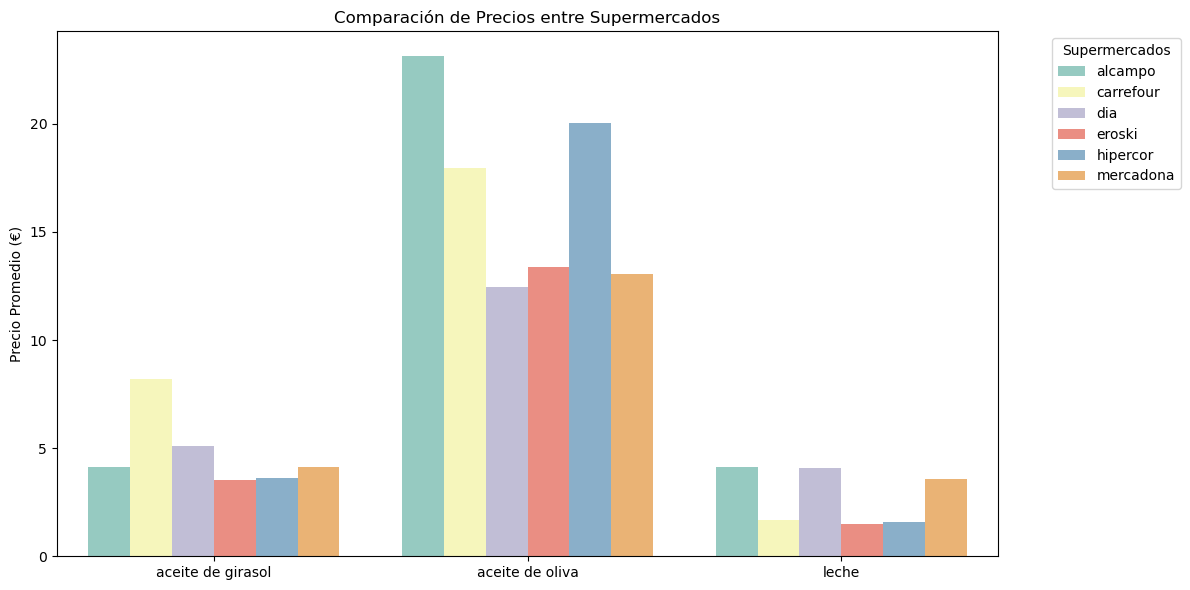

In [11]:
vis.Comparacion_de_Precios_entre_Supermercados(df_result_final)